In [1]:
import numpy as np
import pandas as pd

In [2]:
# read in our data
fp = 'data/data_ingestion.csv'
df = pd.read_csv(fp)

In [3]:
df.columns

Index(['Unnamed: 0', 'Name', 'URL', 'Phone', 'Latitude', 'Longitude',
       'Address', 'City', 'State', 'ZIP', 'Vertical', 'Rating', 'Review Count',
       'Yelp ID', 'Review1', 'Review2', 'Review3', 'Vertical1', 'Vertical2',
       'Vertical3', 'Reviews', 'polarity', 'subjectivity', 'Word1', 'Word2',
       'Word3', 'Word4', 'Word5'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,...,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.858875e+10,32.810650,-117.116113,3755 Murphy Canyon Rd,San Diego,CA,92123,...,None,None,during this stay at home order weve been order...,0.240909,0.387879,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.619239e+10,32.722356,-117.168111,1609 India St,San Diego,CA,92101,...,None,None,due to the whole pandemic we decided to try a ...,0.080570,0.469777,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.619381e+10,32.721302,-117.130202,3001 Beech St,San Diego,CA,92102,...,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.309259,0.516667,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.619265e+10,32.760617,-117.068064,6011 El Cajon Blvd,San Diego,CA,92115,...,Italian,None,omg the meatball covid special is worth ittoo ...,0.399351,0.412143,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.619233e+10,32.723750,-117.168130,1747 India St,San Diego,CA,92101,...,Pizza,Bars,been here so many times time for a local revie...,0.118750,0.306250,pizza,marinara,time,person,light


# A Matrix (Needs Revision)
- Split into 
     - Primary Vertical Matrix (Matrix A1)  
     - Latter Vertical Matrix (Matrix A2)

In [5]:
def data_to_A_matrix(df):
    
    # Helper Function 
    def idx_dictionary(iterable):
        dictionary = {}
        idx = 0
        for element in set(iterable): 
            dictionary[element] = idx
            idx += 1 
        return dictionary
    
    # copy the input
    df = df.copy()
    # prepare our dataframe
    data = df[['Name', 'URL', 'Phone', 'Vertical', 'Yelp ID']].reset_index()
    
    # add a column that is the correct type of vertical instances LIST instead of STR
    unflattened = []
    for x in data.Vertical:
        split = x.split(', ')
        unflattened.append(split)
    
    data['unflattened'] = unflattened
    
    restaurants = data['Yelp ID']

    # Find out which restaurants share a vertical instance 
    update_tuples = []
    # For each restaurant
    for restaurant in restaurants:
        # Find the row corresponding to that restaurant 
        query_value = restaurant
        # Get the vertical associated with the restaurant 
        vertical_val = data.loc[data['Yelp ID'] == query_value]['Vertical'].values[0]
        vertical_idx = data.loc[data['Yelp ID'] == query_value]['Vertical'].index[0]
        
        # Divide the original string into a list with n elements
        cleaned_vert = vertical_val.split(', ')

        # Record indicies of restaurants with atleast one vertical similarity 
        for idx, lst in enumerate(unflattened):
            for element in cleaned_vert:
                if element in lst:
                    update_tuples.append((vertical_idx, idx))
                else:
                    continue

        
    final_tuples = set(update_tuples)
    return final_tuples

In [6]:
A_tuples = data_to_A_matrix(df)
A_tuples

{(185, 101),
 (5, 178),
 (171, 86),
 (67, 137),
 (157, 23),
 (90, 42),
 (53, 166),
 (143, 36),
 (9, 0),
 (184, 26),
 (80, 155),
 (170, 21),
 (119, 90),
 (66, 66),
 (156, 192),
 (52, 17),
 (15, 143),
 (8, 87),
 (109, 177),
 (146, 189),
 (95, 98),
 (118, 129),
 (65, 11),
 (122, 63),
 (108, 126),
 (145, 12),
 (94, 57),
 (41, 179),
 (13, 13),
 (188, 21),
 (121, 110),
 (84, 102),
 (107, 79),
 (70, 81),
 (93, 144),
 (40, 4),
 (3, 152),
 (12, 90),
 (164, 109),
 (97, 70),
 (83, 23),
 (69, 40),
 (177, 127),
 (126, 42),
 (96, 9),
 (59, 127),
 (186, 135),
 (82, 52),
 (45, 64),
 (135, 194),
 (1, 58),
 (125, 99),
 (72, 113),
 (58, 44),
 (148, 174),
 (81, 133),
 (44, 15),
 (7, 149),
 (0, 109),
 (152, 88),
 (101, 91),
 (87, 24),
 (161, 158),
 (181, 68),
 (167, 49),
 (100, 20),
 (63, 96),
 (190, 146),
 (33, 53),
 (56, 146),
 (19, 6),
 (171, 195),
 (194, 96),
 (180, 51),
 (113, 112),
 (76, 124),
 (62, 59),
 (136, 185),
 (18, 197),
 (184, 165),
 (4, 112),
 (156, 91),
 (89, 104),
 (75, 13),
 (8, 194),
 (

In [7]:
from tqdm import tqdm
from scipy.sparse import lil_matrix

In [8]:
# ---------------------------------------------------------------------
# A_matrix_func (WORKING)
# ---------------------------------------------------------------------    

def A_matrix_func(df, update_tuples):
    """
    This function helps create the inital A matrix given its parameters.
    
    :param: 
    :param: 
    
    :return: matrix: The calculated A matrix (Restaurants x Restaurants)
    """
    i = df.shape[0]
    j = df.shape[0] 
    matrix = lil_matrix((i, j), dtype=np.int8)
    print(matrix.shape)

    for tup in tqdm(update_tuples):
        matrix[tup] = 1
    return matrix

In [9]:
A_matrix = A_matrix_func(df, A_tuples)

 34%|███▍      | 11072/32291 [00:00<00:00, 110717.47it/s]

(199, 199)


100%|██████████| 32291/32291 [00:00<00:00, 123122.23it/s]


In [10]:
A_matrix

<199x199 sparse matrix of type '<class 'numpy.int8'>'
	with 32291 stored elements in LInked List format>

In [11]:
import matplotlib.pylab as plt

plt.spy(A_matrix.toarray())

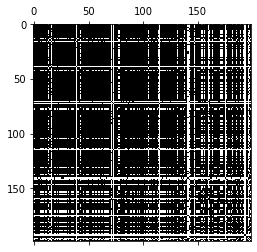

In [12]:
plt.spy(A_matrix.toarray())

# P Matrix (Complete)

In [13]:
# Two restaurants share an edge if they have a similar polarity score

In [14]:
df

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,...,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.858875e+10,32.810650,-117.116113,3755 Murphy Canyon Rd,San Diego,CA,92123,...,None,None,during this stay at home order weve been order...,0.240909,0.387879,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.619239e+10,32.722356,-117.168111,1609 India St,San Diego,CA,92101,...,None,None,due to the whole pandemic we decided to try a ...,0.080570,0.469777,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.619381e+10,32.721302,-117.130202,3001 Beech St,San Diego,CA,92102,...,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.309259,0.516667,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.619265e+10,32.760617,-117.068064,6011 El Cajon Blvd,San Diego,CA,92115,...,Italian,None,omg the meatball covid special is worth ittoo ...,0.399351,0.412143,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.619233e+10,32.723750,-117.168130,1747 India St,San Diego,CA,92101,...,Pizza,Bars,been here so many times time for a local revie...,0.118750,0.306250,pizza,marinara,time,person,light
5,5,CUCINA urbana,https://www.yelp.com/biz/cucina-urbana-san-die...,1.619239e+10,32.731299,-117.160156,505 Laurel St,San Diego,CA,92101,...,Pizza,Wine Bars,stopped in to pick up lunch for myself and a f...,0.283393,0.725179,extremely,place,amazing,curry,practically
6,6,Bencotto Italian Kitchen,https://www.yelp.com/biz/bencotto-italian-kitc...,1.619450e+10,32.724449,-117.168975,750 W Fir St,San Diego,CA,92101,...,Bars,Desserts,i have been coming to bencotto for at least y...,0.001786,0.209524,friend,bencotto,zoo,ive,came
7,7,The Godfather Restaurant,https://www.yelp.com/biz/the-godfather-restaur...,1.858560e+10,32.833260,-117.151680,7878 Clairemont Mesa Blvd,San Diego,CA,92111,...,Venues & Event Spaces,Wine Bars,we love going to the godfather for special occ...,0.512632,0.717526,godfather,amazing,wonderful,love,restaurant
8,8,Ristorante Illando,https://www.yelp.com/biz/ristorante-illando-sa...,1.619694e+10,32.724049,-117.168190,1825 India Street,San Diego,CA,92101,...,None,None,ordered takeaway for easter meal during time o...,0.162833,0.390833,takeaway,o,reservation,second,helpful
9,9,Pomodoro Ristorante Italiano,https://www.yelp.com/biz/pomodoro-ristorante-i...,1.619523e+10,32.721122,-117.230367,2833 Avenida De Portugal,San Diego,CA,92106,...,None,None,this place is always soooo good amazing servic...,0.341667,0.688636,good,place,eye,written,favorite


In [15]:
def data_to_P_matrix(df):
    
    data = df['polarity']
    delta = 0.04
    all_tuples = []
    
    for restaurant, element in enumerate(data):
        upper_threshold = element + delta
        lower_threshold = element - delta
        lst_idx = np.where((data > lower_threshold) & (data < upper_threshold))[0]
        
        
        for match in lst_idx:
            all_tuples.append((restaurant, match))
    return all_tuples
        

In [16]:
P_matrix = data_to_P_matrix(df)

In [17]:
# ---------------------------------------------------------------------
# P_matrix_func (WORKING)
# ---------------------------------------------------------------------    

def P_matrix_func(df, update_tuples):
    """
    This function helps create the inital A matrix given its parameters.
    
    :param: 
    :param: 
    
    :return: matrix: The calculated A matrix (Restaurants x Restaurants)
    """
    i = df.shape[0]
    j = df.shape[0] 
    matrix = lil_matrix((i, j), dtype=np.int8)
    print(matrix.shape)

    for tup in tqdm(update_tuples):
        matrix[tup] = 1
    return matrix

In [18]:
P_matrix = P_matrix_func(df, P_matrix)

100%|██████████| 6039/6039 [00:00<00:00, 98383.04it/s]

(199, 199)


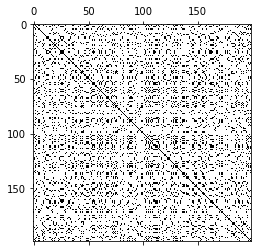

In [19]:
plt.spy(P_matrix.toarray())

# S Matrix (Complete)

In [20]:
# Two restaurants share a edge if they have similar polarity scores

In [21]:
df.head()

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,...,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.858875e+10,32.810650,-117.116113,3755 Murphy Canyon Rd,San Diego,CA,92123,...,None,None,during this stay at home order weve been order...,0.240909,0.387879,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.619239e+10,32.722356,-117.168111,1609 India St,San Diego,CA,92101,...,None,None,due to the whole pandemic we decided to try a ...,0.080570,0.469777,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.619381e+10,32.721302,-117.130202,3001 Beech St,San Diego,CA,92102,...,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.309259,0.516667,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.619265e+10,32.760617,-117.068064,6011 El Cajon Blvd,San Diego,CA,92115,...,Italian,None,omg the meatball covid special is worth ittoo ...,0.399351,0.412143,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.619233e+10,32.723750,-117.168130,1747 India St,San Diego,CA,92101,...,Pizza,Bars,been here so many times time for a local revie...,0.118750,0.306250,pizza,marinara,time,person,light


In [22]:
def data_to_S_matrix(df):
    
    data = df['subjectivity']
    delta = 0.03
    all_tuples = []
    
    for restaurant, element in enumerate(data):
        upper_threshold = element + delta
        lower_threshold = element - delta
        lst_idx = np.where((data > lower_threshold) & (data < upper_threshold))[0]
        
        
        for match in lst_idx:
            all_tuples.append((restaurant, match))
    return all_tuples

In [23]:
# ---------------------------------------------------------------------
# P_matrix_func (WORKING)
# ---------------------------------------------------------------------    

def P_matrix_func(df, update_tuples):
    """
    This function helps create the inital A matrix given its parameters.
    
    :param: 
    :param: 
    
    :return: matrix: The calculated A matrix (Restaurants x Restaurants)
    """
    i = df.shape[0]
    j = df.shape[0] 
    matrix = lil_matrix((i, j), dtype=np.int8)
    print(matrix.shape)

    for tup in tqdm(update_tuples):
        matrix[tup] = 1
    return matrix

In [24]:
S_matrix = data_to_S_matrix(df)
S_matrix = P_matrix_func(df, S_matrix)

100%|██████████| 5729/5729 [00:00<00:00, 139474.98it/s]

(199, 199)


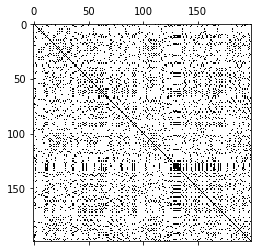

In [25]:
plt.spy(S_matrix.toarray())

# D Matrix (Complete)

In [26]:
# Two restaurants share an edge if they are within 10 miles from eachother

In [27]:
df.head()

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,...,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.858875e+10,32.810650,-117.116113,3755 Murphy Canyon Rd,San Diego,CA,92123,...,None,None,during this stay at home order weve been order...,0.240909,0.387879,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.619239e+10,32.722356,-117.168111,1609 India St,San Diego,CA,92101,...,None,None,due to the whole pandemic we decided to try a ...,0.080570,0.469777,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.619381e+10,32.721302,-117.130202,3001 Beech St,San Diego,CA,92102,...,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.309259,0.516667,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.619265e+10,32.760617,-117.068064,6011 El Cajon Blvd,San Diego,CA,92115,...,Italian,None,omg the meatball covid special is worth ittoo ...,0.399351,0.412143,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.619233e+10,32.723750,-117.168130,1747 India St,San Diego,CA,92101,...,Pizza,Bars,been here so many times time for a local revie...,0.118750,0.306250,pizza,marinara,time,person,light


In [30]:
import math


def distance_from_coordinates(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float (lat, long)
    destination : tuple of float (lat, long)

    Returns
    -------
    distance_in_mi : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    km = radius * c
    
    # 1 Kilometre = 0.621371 Mile
    ratio = 0.621371

    # Converting km to mi.
    mi = km * ratio


    return mi

In [104]:
def data_to_D_matrix(df):
    coordinate_tuples = list(zip(df['Latitude'],df['Longitude']))
    threshold_distance = 3.5 # Miles

    update_tuples = []
    
    for origin in range(len(df)):
        for idx, destination in enumerate(coordinate_tuples):
        # Calculate distance between origin and destination
            distance = distance_from_coordinates(coordinate_tuples[origin], destination)
            if distance <= threshold_distance:
                update_tuples.append((origin, idx))
                
                
    return update_tuples

In [105]:
# ---------------------------------------------------------------------
# D_matrix_func (WORKING)
# ---------------------------------------------------------------------    

def D_matrix_func(df, update_tuples):
    """
    This function helps create the inital A matrix given its parameters.
    
    :param: 
    :param: 
    
    :return: matrix: The calculated A matrix (Restaurants x Restaurants)
    """
    i = df.shape[0]
    j = df.shape[0] 
    matrix = lil_matrix((i, j), dtype=np.int8)

    for tup in tqdm(update_tuples):
        matrix[tup] = 1
    return matrix

In [106]:
D_matrix = data_to_D_matrix(df)
D_matrix = D_matrix_func(df, D_matrix)

100%|██████████| 8671/8671 [00:00<00:00, 141170.12it/s]


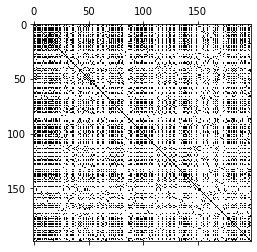

In [107]:
plt.spy(D_matrix.toarray())

# R Matrix (Complete)

Two restaurants will share an edge if they have similar review counts (within 10)

In [108]:
df.head()

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,...,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.858875e+10,32.810650,-117.116113,3755 Murphy Canyon Rd,San Diego,CA,92123,...,None,None,during this stay at home order weve been order...,0.240909,0.387879,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.619239e+10,32.722356,-117.168111,1609 India St,San Diego,CA,92101,...,None,None,due to the whole pandemic we decided to try a ...,0.080570,0.469777,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.619381e+10,32.721302,-117.130202,3001 Beech St,San Diego,CA,92102,...,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.309259,0.516667,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.619265e+10,32.760617,-117.068064,6011 El Cajon Blvd,San Diego,CA,92115,...,Italian,None,omg the meatball covid special is worth ittoo ...,0.399351,0.412143,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.619233e+10,32.723750,-117.168130,1747 India St,San Diego,CA,92101,...,Pizza,Bars,been here so many times time for a local revie...,0.118750,0.306250,pizza,marinara,time,person,light


In [109]:
def data_to_R_matrix(df):
    data = df['Review Count']
    delta = 25
    update_tuples = []
    
    for restaurant, element in enumerate(data):
        upper_threshold = element + delta
        lower_threshold = element - delta
        lst_idx = np.where((data > lower_threshold) & (data < upper_threshold))[0]
         
        for match in lst_idx:
            update_tuples.append((restaurant, match))
            
    return update_tuples

In [110]:
# ---------------------------------------------------------------------
# R_matrix_func (WORKING)
# ---------------------------------------------------------------------    

def R_matrix_func(df, update_tuples):
    """
    This function helps create the inital A matrix given its parameters.
    
    :param: 
    :param: 
    
    :return: matrix: The calculated A matrix (Restaurants x Restaurants)
    """
    i = df.shape[0]
    j = df.shape[0] 
    matrix = lil_matrix((i, j), dtype=np.int8)

    for tup in tqdm(update_tuples):
        matrix[tup] = 1
    return matrix

In [111]:
R_matrix = data_to_R_matrix(df)
R_matrix = R_matrix_func(df, R_matrix)

100%|██████████| 1879/1879 [00:00<00:00, 83459.68it/s]


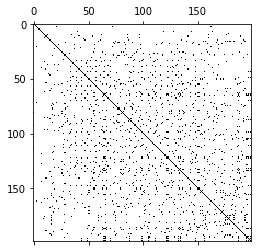

In [112]:
plt.spy(R_matrix.toarray())

# W Matrix (Complete)

Two restaurants will share an edge if they have atleast 3 of the same top words

In [113]:
df.columns

Index(['Unnamed: 0', 'Name', 'URL', 'Phone', 'Latitude', 'Longitude',
       'Address', 'City', 'State', 'ZIP', 'Vertical', 'Rating', 'Review Count',
       'Yelp ID', 'Review1', 'Review2', 'Review3', 'Vertical1', 'Vertical2',
       'Vertical3', 'Reviews', 'polarity', 'subjectivity', 'Word1', 'Word2',
       'Word3', 'Word4', 'Word5'],
      dtype='object')

In [114]:
df.head()

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,...,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.858875e+10,32.810650,-117.116113,3755 Murphy Canyon Rd,San Diego,CA,92123,...,None,None,during this stay at home order weve been order...,0.240909,0.387879,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.619239e+10,32.722356,-117.168111,1609 India St,San Diego,CA,92101,...,None,None,due to the whole pandemic we decided to try a ...,0.080570,0.469777,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.619381e+10,32.721302,-117.130202,3001 Beech St,San Diego,CA,92102,...,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.309259,0.516667,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.619265e+10,32.760617,-117.068064,6011 El Cajon Blvd,San Diego,CA,92115,...,Italian,None,omg the meatball covid special is worth ittoo ...,0.399351,0.412143,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.619233e+10,32.723750,-117.168130,1747 India St,San Diego,CA,92101,...,Pizza,Bars,been here so many times time for a local revie...,0.118750,0.306250,pizza,marinara,time,person,light


In [149]:
def data_to_W_matrix(df):
    
    def common(lst1, lst2): 
        return len(list(set(lst1) & set(lst2)))

    word_tuples = list(zip(df['Word1'],df['Word2'],df['Word3'],df['Word4'], df['Word5']))
    update_tuples = []
    
    for idx, restaurant in enumerate(word_tuples):
        for idx_c, compare in enumerate(word_tuples):
            num_common = common(restaurant, compare)
            #print(num_common)
            if num_common >= 2:
                update_tuples.append((idx, idx_c))
    
    return update_tuples

In [150]:
# ---------------------------------------------------------------------
# W_matrix_func (WORKING)
# ---------------------------------------------------------------------    

def W_matrix_func(df, update_tuples):
    """
    This function helps create the inital A matrix given its parameters.
    
    :param: 
    :param: 
    
    :return: matrix: The calculated A matrix (Restaurants x Restaurants)
    """
    i = df.shape[0]
    j = df.shape[0] 
    matrix = lil_matrix((i, j), dtype=np.int8)

    for tup in tqdm(update_tuples):
        matrix[tup] = 1
    return matrix

In [151]:
W_matrix = data_to_W_matrix(df)
print(len(W_matrix))
W_matrix = W_matrix_func(df, W_matrix)

100%|██████████| 813/813 [00:00<00:00, 127795.57it/s]

813


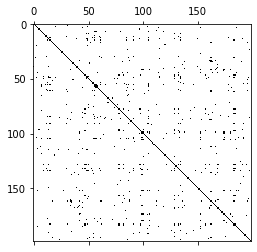

In [152]:
plt.spy(W_matrix.toarray())